In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

2024-05-20 17:16:16.398088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 17:16:16.398326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 17:16:16.578129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load dataset
dataset_path = '/kaggle/input/heycoffee'
train_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="training", seed=123, image_size=(224, 224), batch_size=32)
val_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="validation", seed=123, image_size=(224, 224), batch_size=32)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 435s 14s/step - accuracy: 0.2522 - loss: 3.1012 - val_accuracy: 0.0050 - val_loss: 3.1581
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 366s 13s/step - accuracy: 0.3779 - loss: 1.6969 - val_accuracy: 0.1493 - val_loss: 2.6874
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 398s 15s/step - accuracy: 0.4409 - loss: 1.5734 - val_accuracy: 0.1493 - val_loss: 2.8845
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 429s 14s/step - accuracy: 0.4458 - loss: 1.4738 - val_accuracy: 0.1493 - val_loss: 2.8116
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 361s 13s/step - accuracy: 0.4759 - loss: 1.4908 - val_accuracy: 0.0995 - val_loss: 3.3359
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 402s 14s/step - accuracy: 0.4474 - loss: 1.5644 - val_accuracy: 0.0547 - val_loss: 3.3788
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 369s 14s/step - accuracy: 0.4223 - loss: 1.5404 - val_accuracy: 0.1493 - val_loss: 3.8675


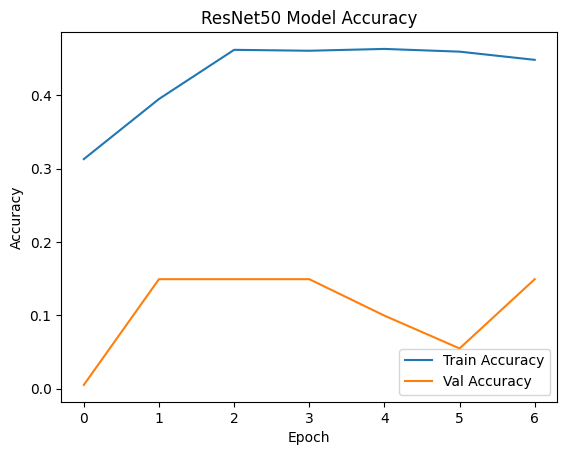

In [3]:
# Define ResNet50 Model without Pre-trained Weights
resnet50 = ResNet50(weights=None, input_shape=(224, 224, 3), include_top=False)
resnet50.trainable = True  # Train the entire model

# Add custom layers on top
model_resnet50 = models.Sequential([
    resnet50,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet50 Model
checkpoint_resnet50 = ModelCheckpoint('resnet50_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_resnet50 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_resnet50 = model_resnet50.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[checkpoint_resnet50, early_stop_resnet50])

# Plot training and validation accuracy for ResNet50 Model
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('ResNet50 Model Accuracy')
plt.show()

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 173s 5s/step - accuracy: 0.2689 - loss: 2.0077 - val_accuracy: 0.1493 - val_loss: 2.2965
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.4211 - loss: 1.6344 - val_accuracy: 0.0697 - val_loss: 2.2947
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.4212 - loss: 1.5373 - val_accuracy: 0.1493 - val_loss: 2.2788
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.5161 - loss: 1.3916 - val_accuracy: 0.1144 - val_loss: 2.2831
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.5091 - loss: 1.3423 - val_accuracy: 0.1144 - val_loss: 2.2689
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.5559 - loss: 1.2359 - val_accuracy: 0.1144 - val_loss: 2.2627
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.6229 - loss: 1.0646 - val_accuracy: 0.1144 - val_loss: 2.2929
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.5810 - loss: 1.1289 - val_accuracy: 0.1493 - v

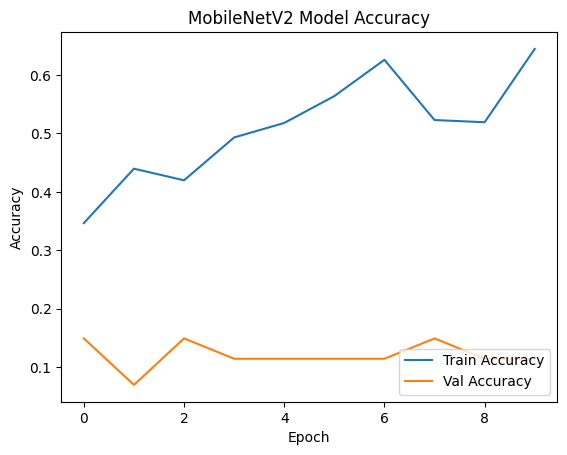

In [4]:
# Define MobileNetV2 Model without Pre-trained Weights
mobilenet_v2 = MobileNetV2(weights=None, input_shape=(224, 224, 3), include_top=False)
mobilenet_v2.trainable = True  # Train the entire model

# Add custom layers on top
model_mobilenet_v2 = models.Sequential([
    mobilenet_v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Ass
    
    uming 10 classes
])

model_mobilenet_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MobileNetV2 Model
checkpoint_mobilenet_v2 = ModelCheckpoint('mobilenet_v2_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_mobilenet_v2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mobilenet_v2 = model_mobilenet_v2.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[checkpoint_mobilenet_v2, early_stop_mobilenet_v2])

# Plot training and validation accuracy for MobileNetV2 Model
plt.plot(history_mobilenet_v2.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet_v2.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('MobileNetV2 Model Accuracy')
plt.show()

In [5]:
# Evaluate both models
resnet50_loss, resnet50_accuracy = model_resnet50.evaluate(val_dataset)
mobilenet_v2_loss, mobilenet_v2_accuracy = model_mobilenet_v2.evaluate(val_dataset)

print(f"ResNet50 Model - Loss: {resnet50_loss}, Accuracy: {resnet50_accuracy}")
print(f"MobileNetV2 Model - Loss: {mobilenet_v2_loss}, Accuracy: {mobilenet_v2_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1443 - loss: 2.6947
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 572ms/step - accuracy: 0.1381 - loss: 2.2463
ResNet50 Model - Loss: 2.6874353885650635, Accuracy: 0.1492537260055542
MobileNetV2 Model - Loss: 2.26269268989563, Accuracy: 0.11442785710096359


ResNet50 Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


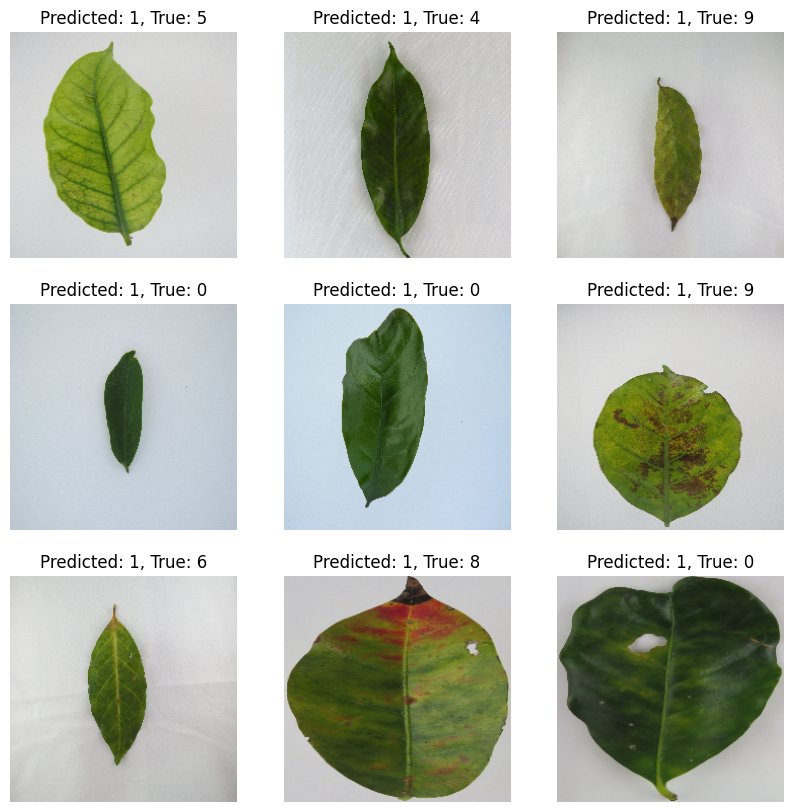

MobileNetV2 Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


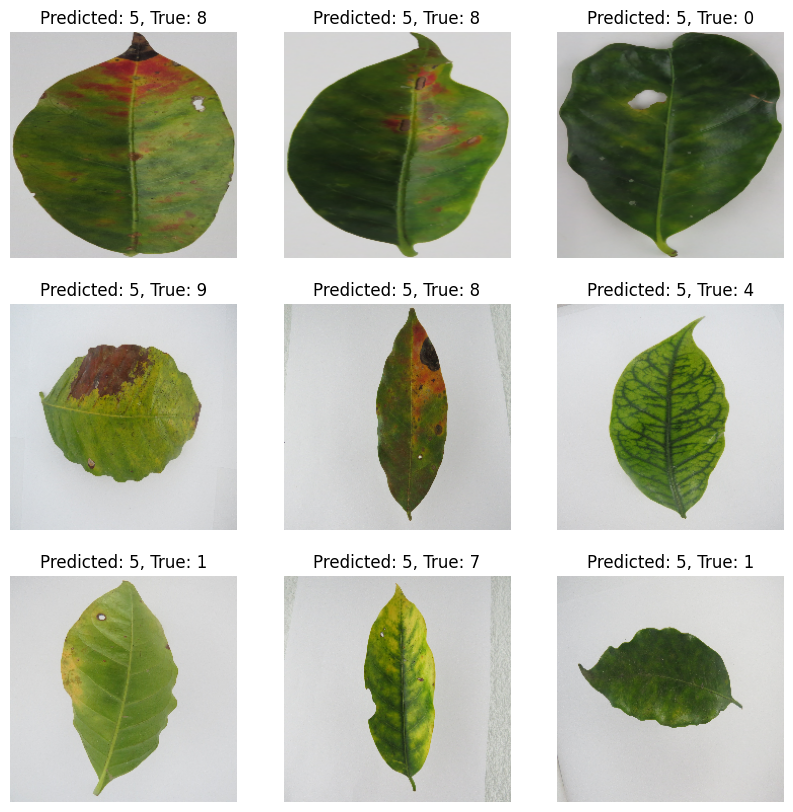

In [6]:
# Visualize some predictions
def plot_predictions(model, dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(9):
            plt.subplot(3, 3, i+1)
            image = images[i].numpy()
            image = (image * 255).astype(np.uint8)  # Scale back to [0, 255] range
            plt.imshow(image)
            plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {labels[i].numpy()}")
            plt.axis("off")
    plt.show()

print("ResNet50 Model Predictions:")
plot_predictions(model_resnet50, val_dataset)

print("MobileNetV2 Model Predictions:")
plot_predictions(model_mobilenet_v2, val_dataset)